Hepatitis C is a viral infection that causes liver inflammation, sometimes leading to serious liver damage. The hepatitis C virus (HCV) spreads through contaminated blood.

The infection was one of the main death causes from 1960 to 1970. In this project, we will be studying a dataset of Hepatitis C infection. The dataset was donated by the Medical University Hannover (MHH); Hannover, Germany.

You will walk through an example containing some data preparation, classification task and a clustering task to end up with a conclusion part where you will be comparing the two methods and providing explanation about the observed phenomenon.

Details:

In this project, you will be :
* Loading the data and cleaning it to be ready for the machine learning tasks (cleaning includes : data types checks, missing values…. )

* You will be clustering the data without taking into account the provided target, then storing those clusters as a new feature in the dataset.

* You will be building a model to classify this data, evaluate it on a test set then storing the new test set, so that it includes : the clusters, the targets and the predicted targets.

* Finally, you will compare the obtained clusters' composition with both the actual targets and the predicted ones using the previously stored test set.

Here is the link to the https://github.com/CLA-Data-Science-Bootcamp/unit3_Project  for this project
Good Luck!

**1. Loading and cleaning the Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading dataset

df = pd.read_csv('/content/HepatitisCdata.csv')

In [ ]:
# Data type

df.dtypes

,0
Unnamed: 0,int64
Category,object
Age,int64
Sex,object
ALB,float64
ALP,float64
ALT,float64
AST,float64
BIL,float64
CHE,float64


In [ ]:
# 5 first rows

df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
# Check for missing values

df.isnull().sum()


,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0


In [ ]:
# Fill missing values with the mean or median for numeric columns only

for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-6-639defb9944c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
# Descriptive statistics

df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.775920,25.643955,25.448940,33.090690,19.673150,2.205657,1.123466,49.756166,54.661071,5.398234
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.900000,66.700000,23.000000,25.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
# Check for duplicate rows
df.duplicated().sum()

# Drop duplicate rows if necessary
df = df.drop_duplicates()


**2. Clustering the data with K-Means**

```
# Ce texte est au format code
```



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Selecting the numerical columns for clustering
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])


In [ ]:
# Reduce the dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

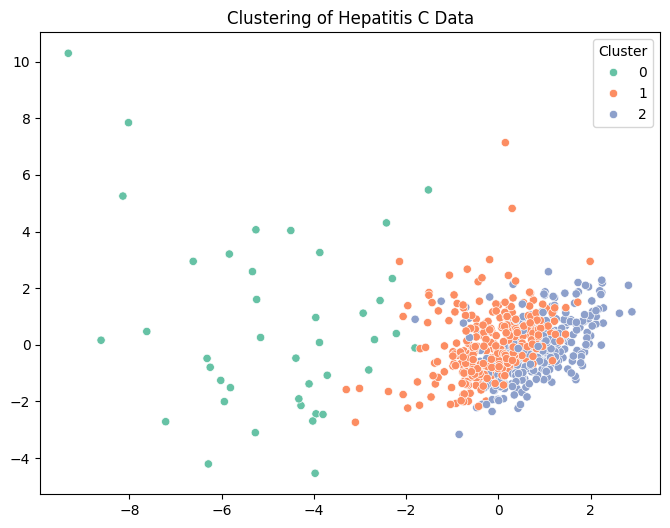

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Selecting the numerical columns for clustering
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

# Reduce the dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Applying KMeans clustering
# Assuming you want 3 clusters, adjust n_clusters as needed
kmeans = KMeans(n_clusters=3, random_state=42)  # Setting random_state for reproducibility
df['Cluster'] = kmeans.fit_predict(scaled_data) #add cluster labels to a new 'Cluster' column in the original DataFrame (df)

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df['Cluster'], palette="Set2")
plt.title('Clustering of Hepatitis C Data')
plt.show()

**3. Building Classificiation Model**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Assuming 'Category' is the column we want to predict, as 'target' is not present in the DataFrame.
X = df.drop(columns=['Category'])  # Features (including clusters)
y = df['Category']  # Target column

# Convert categorical columns in X to numerical using one-hot encoding
X = pd.get_dummies(X)

#Splitting the data (80% train, 20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Classification model : Random forest

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluating the model

from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.959349593495935
Classification Report:
                         precision    recall  f1-score   support

         0=Blood Donor       1.00      1.00      1.00        96
0s=suspect Blood Donor       1.00      0.67      0.80         3
           1=Hepatitis       0.88      0.78      0.82         9
            2=Fibrosis       0.67      1.00      0.80         6
           3=Cirrhosis       0.88      0.78      0.82         9

              accuracy                           0.96       123
             macro avg       0.88      0.84      0.85       123
          weighted avg       0.97      0.96      0.96       123



In [ ]:
# Add the actual and predicted target values to the test set
X_test['Actual_Target'] = y_test
X_test['Predicted_Target'] = y_pred
X_test['Cluster'] = df.loc[X_test.index, 'Cluster']  # Adding the cluster information

# Save the test set with predictions
X_test.to_csv('test_set_with_predictions.csv', index=False)


In [ ]:
# Classification model : Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier on the training set
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Evaluate the model

from sklearn.metrics import classification_report, accuracy_score

# Select only the features used during training for prediction
X_test_for_prediction = X_test[X_train.columns]  # Use the same columns as in X_train

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_for_prediction)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Accuracy: 0.8699186991869918
Classification Report:
                         precision    recall  f1-score   support

         0=Blood Donor       0.97      1.00      0.98        96
0s=suspect Blood Donor       0.14      0.33      0.20         3
           1=Hepatitis       0.80      0.44      0.57         9
            2=Fibrosis       0.38      0.50      0.43         6
           3=Cirrhosis       0.75      0.33      0.46         9

              accuracy                           0.87       123
             macro avg       0.61      0.52      0.53       123
          weighted avg       0.89      0.87      0.87       123



In [ ]:
# Add the actual and predicted target values to the test set
X_test['Actual_Target'] = y_test
X_test['Predicted_Target_LogReg'] = y_pred_log_reg
X_test['Cluster'] = df.loc[X_test.index, 'Cluster']  # Adding the cluster information

# Save the test set with predictions
X_test.to_csv('test_set_with_predictions_logreg.csv', index=False)


**4. Comparing the Clusters**

In [ ]:
# Loading the results

df_results = pd.read_csv('/content/test_set_with_predictions.csv')

In [ ]:
#Comparing Clusters with target

cluster_target_counts = df_results.groupby(['Cluster', 'Actual_Target']).size().unstack(fill_value=0)
print(cluster_target_counts)

Actual_Target  0=Blood Donor  0s=suspect Blood Donor  1=Hepatitis  2=Fibrosis  \
Cluster                                                                         
0                          0                       2            1           1   
1                         44                       1            4           5   
2                         52                       0            4           0   

Actual_Target  3=Cirrhosis  
Cluster                     
0                        6  
1                        2  
2                        1  


In [ ]:
# Comparing CLuster with Target : Random forest

cluster_target_counts = df_results.groupby(['Cluster', 'Actual_Target']).size().unstack(fill_value=0)
print(cluster_target_counts)

Actual_Target  0=Blood Donor  0s=suspect Blood Donor  1=Hepatitis  2=Fibrosis  \
Cluster                                                                         
0                          0                       2            1           1   
1                         44                       1            4           5   
2                         52                       0            4           0   

Actual_Target  3=Cirrhosis  
Cluster                     
0                        6  
1                        2  
2                        1  


In [ ]:
#Comparing Clusters with target : Logistic Regression

cluster_target_counts = df_results.groupby(['Cluster', 'Actual_Target']).size().unstack(fill_value=0)
print(cluster_target_counts)

Actual_Target  0=Blood Donor  0s=suspect Blood Donor  1=Hepatitis  2=Fibrosis  \
Cluster                                                                         
0                          0                       2            1           1   
1                         44                       1            4           5   
2                         52                       0            4           0   

Actual_Target  3=Cirrhosis  
Cluster                     
0                        6  
1                        2  
2                        1  


Transfer to power BI

In [ ]:
import pandas as pd

# Assuming 'df_results' is your final DataFrame
# and you want to save it as 'HepatitisCdata.csv':
df_results.to_csv('/content/HepatitisCdata.csv', index=False)

# If you have a different DataFrame you want to save,
# replace 'df_results' with the correct variable name.


In [ ]:
from google.colab import files
files.download('/content/HepatitisCdata.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>